<a href="https://colab.research.google.com/github/NeuralClassifier/OutlierDetect/blob/main/Local_Global_Outliers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor
import zipfile
import os
import shutil
import pandas as pd
from sklearn.neighbors import NearestNeighbors

In [ ]:
!git clone https://github.com/NeuralClassifier/OutlierDetect

In [ ]:
def unzipFile(file_name, exctraction_place):
  with zipfile.ZipFile(file_name,"r") as zip_ref:
      zip_ref.extractall(exctraction_place)
def removeFolder(file_path):
  try:
    shutil.rmtree(file_path)
  except OSError as e:
    print("Error: %s - %s." % (e.filename, e.strerror))

In [ ]:
unzipFile('50p.zip','/content/')

In [ ]:
df = pd.read_excel('/content/50p/3/50p_m3_dim2.xlsx')
df.drop(['Unnamed: 0'],axis = 1,inplace = True)
df

In [ ]:
(max(X[:, 0])+1)*(-1)

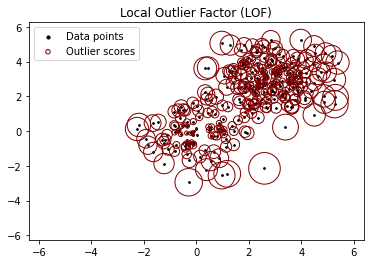

In [ ]:
X = np.array(df.iloc[:,:-1])
clf = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
# use fit_predict to compute the predicted labels of the training samples
# (when LOF is used for outlier detection, the estimator has no predict,
# decision_function and score_samples methods).
y_pred = clf.fit_predict(X)
#n_errors = (y_pred != ground_truth).sum()
X_scores = clf.negative_outlier_factor_

plt.title("Local Outlier Factor (LOF)")
plt.scatter(X[:, 0], X[:, 1], color="k", s=3.0, label="Data points")
# plot circles with radius proportional to the outlier scores
radius = (X_scores.max() - X_scores) / (X_scores.max() - X_scores.min())
plt.scatter(X[:, 0],X[:, 1],s=1000 * radius,edgecolors="maroon",facecolors="none",label="Outlier scores",)
plt.axis("tight")
plt.xlim(((max(X[:, 0])+1)*(-1), max(X[:, 0])+1))
plt.ylim(((max(X[:, 1])+1)*(-1), max(X[:, 1])+1))
#plt.xlabel("prediction errors: %d" % (n_errors))
legend = plt.legend(loc="upper left")
legend.legendHandles[0]._sizes = [10]
legend.legendHandles[1]._sizes = [20]
plt.show()

In [ ]:
df_lofnorm=pd.concat([df,pd.DataFrame(radius,columns=['normalized_LOF'])],axis=1)
df_lofnorm

In [ ]:
df_lofnorm.sort_values(["normalized_LOF"], ascending=False)

In [ ]:
#LOF

red = [30,50,70,90]
p70 = [1,2,3,4]
redPath = '/content/OutlierDetect/Data/reduced_synthetic_data/'

#path_reduced = "/content/"+str(self.reduction)+'p'
#os.mkdir(path_reduced)
#path = "/content/"+str(self.reduction)+'p'+"/outlierScore_perData/"
#os.mkdir(path)

for folders in red:
  subfold = redPath+str(folders)+'p/'
  p70 = [1,2,3,4]
  for subsub in p70:
    subfold = redPath+str(folders)+'p/'
    subfold = subfold+str(subsub)+'/'
    path = subfold+'/LOF/'
    os.mkdir(path)
    dim = [2, 10, 20, 40, 80, 100]
    for files in dim:
      filename = subfold+str(folders)+'p'+'_m'+str(subsub)+'_dim'+str(files)+'.xlsx'
      df = pd.read_excel(filename)
      df.drop(['Unnamed: 0'],axis=1,inplace=True)
      X = np.array(df.iloc[:,:-1])
      clf = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
      y_pred = clf.fit_predict(X)
      X_scores = clf.negative_outlier_factor_
      #plt.title("Local Outlier Factor (LOF)")
      #plt.scatter(X[:, 0], X[:, 1], color="k", s=3.0, label="Data points")
      # plot circles with radius proportional to the outlier scores
      radius = (X_scores.max() - X_scores) / (X_scores.max() - X_scores.min())
      #plt.scatter(X[:, 0],X[:, 1],s=1000 * radius,edgecolors="maroon",facecolors="none",label="Outlier scores",)
      #plt.axis("tight")
      #plt.xlim(((max(X[:, 0])+1)*(-1), max(X[:, 0])+1))
      #plt.ylim(((max(X[:, 1])+1)*(-1), max(X[:, 1])+1))
      #plt.xlabel("prediction errors: %d" % (n_errors))
      #legend = plt.legend(loc="upper left")
      #legend.legendHandles[0]._sizes = [10]
      #legend.legendHandles[1]._sizes = [20]
      #plt.show()
      df_lofnorm=pd.concat([df,pd.DataFrame(radius,columns=['normalized_LOF'])],axis=1)
      df_lofnorm.to_excel(path+str(folders)+'p'+'_m'+str(subsub)+'_dim'+str(files)+'_LOF.xlsx')

In [ ]:
def replace_lbls(lbl, indx):
  for idx in indx:
    lbl[idx] = 1
  return lbl

In [ ]:
#KNN


def replace_lbls(lbl, indx):
  for idx in indx:
    lbl[idx] = 1
  return lbl

red = [30,50,70,90]
p70 = [1,2,3,4]
redPath = '/content/OutlierDetect/Data/reduced_synthetic_data/'

#path_reduced = "/content/"+str(self.reduction)+'p'
#os.mkdir(path_reduced)
#path = "/content/"+str(self.reduction)+'p'+"/outlierScore_perData/"
#os.mkdir(path)

for folders in red:
  subfold = redPath+str(folders)+'p/'
  p70 = [1,2,3,4]
  for subsub in p70:
    subfold = redPath+str(folders)+'p/'
    subfold = subfold+str(subsub)+'/'
    path = subfold+'/KNNOut/'
    os.mkdir(path)
    dim = [2, 10, 20, 40, 80, 100]
    for files in dim:
      filename = subfold+str(folders)+'p'+'_m'+str(subsub)+'_dim'+str(files)+'.xlsx'
      df = pd.read_excel(filename)
      df.drop(['Unnamed: 0'],axis=1,inplace=True)
      X = np.array(df.iloc[:,:-1])

      # instantiate model
      nbrs = NearestNeighbors(n_neighbors = 10)
      # fit model
      nbrs.fit(X)
      # distances and indexes of k-neighbors from model outputs
      distances, indexes = nbrs.kneighbors(X)
      lbl = np.zeros((len(X),), dtype=int)
      #print(distances)
      #print(list(indexes))
  
      # plot mean of k-distances of each observation
      plt.plot(distances.mean(axis =1))
      plt.show()
      # visually determine cutoff values > 0.15
      thres = float(input('Enter threshold: '))
      outlier_index = np.where(distances.mean(axis = 1) > thres)
      #print(outlier_index)
      lbl = replace_lbls(lbl,outlier_index)

      #clf = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
      #y_pred = clf.fit_predict(X)
      #X_scores = clf.negative_outlier_factor_
      #plt.title("Local Outlier Factor (LOF)")
      #plt.scatter(X[:, 0], X[:, 1], color="k", s=3.0, label="Data points")
      # plot circles with radius proportional to the outlier scores
      #radius = (X_scores.max() - X_scores) / (X_scores.max() - X_scores.min())
      #plt.scatter(X[:, 0],X[:, 1],s=1000 * radius,edgecolors="maroon",facecolors="none",label="Outlier scores",)
      #plt.axis("tight")
      #plt.xlim(((max(X[:, 0])+1)*(-1), max(X[:, 0])+1))
      #plt.ylim(((max(X[:, 1])+1)*(-1), max(X[:, 1])+1))
      #plt.xlabel("prediction errors: %d" % (n_errors))
      #legend = plt.legend(loc="upper left")
      #legend.legendHandles[0]._sizes = [10]
      #legend.legendHandles[1]._sizes = [20]
      #plt.show()
      df_lofnorm=pd.concat([df,pd.DataFrame(lbl,columns=['KNN_ouliers'])],axis=1)
      df_lofnorm.to_excel(path+str(folders)+'p'+'_m'+str(subsub)+'_dim'+str(files)+'_KNNOut.xlsx')
      #break
    #break
  #break

In [ ]:
df_lofnorm

In [ ]:
%rm -rf /content/OutlierDetect

In [ ]:
!zip -r /content/reduced_synthetic_data.zip /content/reduced_synthetic_data

In [ ]:
!zip -r /content/reduced_synthetic_data.zip . i /content/OutlierDetect/Data/reduced_synthetic_data

In [ ]:
removeFolder('/content/70p')